In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf

In [68]:
mu, sigma, n = 10, 1, 100 # mean, standard deviation and number
gramas = np.random.normal(mu, sigma, n)
cals = gramas + np.random.normal(mu, sigma+.3, n)
df = pd.DataFrame(data = {
                            'gramas': gramas,
                            'cals': cals
                        }
                )
df.head()

,gramas,cals
0,9.109604,19.221610
1,9.856562,20.621152
2,9.501005,19.830465
3,10.158414,16.541941
4,9.727801,20.989186


In [78]:
def reta(
        x: float,
        intercept: int = 5,
        slope: int = 5,
        bias: int = 0
    ) -> float:
    y = intercept + x * slope + bias
    return y

In [119]:
reg = smf.ols('cals ~ gramas', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cals   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     54.99
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           4.37e-11
Time:                        12:30:27   Log-Likelihood:                -162.88
No. Observations:                 100   AIC:                             329.8
Df Residuals:                      98   BIC:                             335.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6198      1.294      8.209      0.000       8.052      13.187
gramas         0.9420      0.127      7.416      0.000       0.690       1.194
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.047
Skew:                          -0.038   Prob(JB):                        0.977
Kurtosis:                       2.925   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

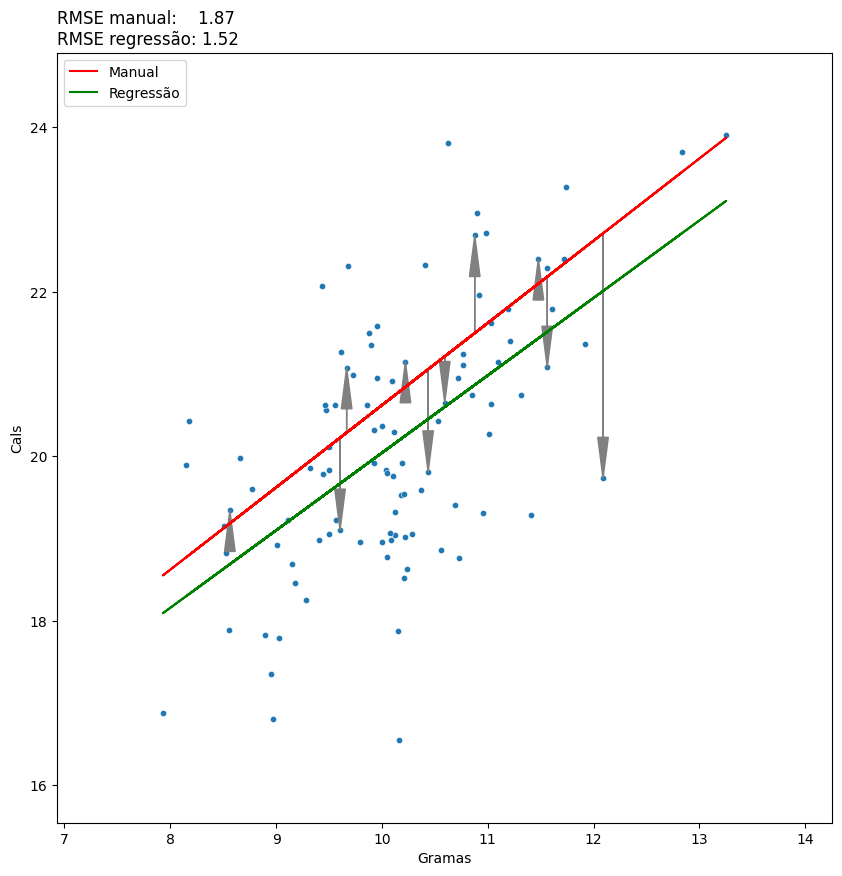

In [151]:
dados_reta = [10.6198, 1,]
df['cals_curva'] = df['gramas'].apply(reta, args=dados_reta)

fig = plt.figure(figsize=(10, 10))
x = 'gramas'
y = 'cals'
sns.scatterplot(
    x=x,
    y=y,
    legend=False,
    s=20,
    data=df
)
plt.plot(df['gramas'], df['cals_curva'], c='r', label='Manual')
x_obs = df['gramas']
y_pred = reg.predict(x_obs)
plt.plot(x_obs, y_pred, 'g', label='Regressão')

plt.legend(loc="upper left")

plt.xlabel(x.title())
plt.ylabel(y.title())

for n in range(10):
    index = df['gramas'].sample(1).index[0]
    x = df['gramas'][index]
    y = df['cals_curva'][index]
    d = df['cals'][index] - y

    plt.arrow(
        x,
        y,
        0,
        d,
        head_width=.1,
        head_length=.50,
        length_includes_head=True,
        color='grey',
    )


rmse_manual = mean_squared_error(df['cals_curva'], df['cals'])
rmse_reg = mean_squared_error(y_pred, df['cals'])
plt.title(f"RMSE manual:    {rmse_manual:,.2f}\nRMSE regressão: {rmse_reg:,.2f}", loc='left')

plt.xlim([
    df.gramas.min()-1,
    df.gramas.max()+1
])
plt.ylim([
    df.cals.min()-1,
    df.cals.max()+1
])
plt.show()